# Stroop Effect 
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='pink'>PURPLE</font>, <font color='green'>ORANGE</font>. In each case, the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

I tried out the stroop task [On this website](https://faculty.washington.edu/chudler/java/ready.html). I was asked to say the color of the 25 words in each group and recorded my time. Here are my results:  
Congruent words: 12.236 seconds  
Incongruent words: 26.956 seconds  

In this project, I will use descriptive statistics and a statistical test to analyze the Stroop effect. My analysis will be demonstrated by answering the following set of questions.

#### 1. What is our independent variable? What is our dependent variable?

Independent variable: whether the color that the word is respresenting and the ink color of the word match or not.  
Dependent variable: Time it takes to name the ink colors in equally-sized lists.  
    
#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The statistical test I will conduct will be based on the following assumptions:
1. The data is collected from a representative, randomly selected portion of the total population;
2. The population distributions of both Congruent and Incongruent tasks are normal.  

The null hypothesis $H_{0}$ is that comparing to the congruent words condition, the incongruent words condition will not signigicantly increase the population reaction time on the task; the alternative hypothesis $H_{a}$ is that comparing to the congruent words condition, the incongruent words condition will significantly increase
the mean of the population reaction time of the task.
$$H_{0}: \mu_{incongruent} - \mu_{congruent} \leq 0$$
$$H_{a}: \mu_{incongruent} - \mu_{congruent} \gt 0$$

I will perform a one-tailed dependent t-test for paired samples as
- We want to approve if the time taken for the incongruent words condition task is longer than the congruent words condition task. Therefore we use the one-tailed statistical test.
- The two samples under incongruent and congruent words conditions were taken from the same group of subjects. Therefore we use the dependent statistical test.
- Our sample size is 24 and is less than 30. In addition, the population statistics are unknown. Therefore we use the t-test rather than z-test.

The one-tailed dependent t-test will show if the mean response time of incongruent words condition task is statistically significantly longer than the response time of congruent words condition task at an alpha level of 0.05. 


#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [109]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t

stroop = pd.read_csv("stroopEffect.csv")

In [110]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [111]:
# Sample size
sampleSize = len(stroop)
sampleSize

24

In [112]:
# Mean response time of Congruent task
meanCon = np.mean(stroop['Congruent'])
meanCon

14.051124999999999

In [113]:
# Mean response time of Incogruent task
meanIncon = np.mean(stroop['Incongruent'])
meanIncon

22.015916666666666

In [114]:
# Mean difference of Incongruent and Congruent tasks
meanDiff = meanIncon - meanCon
meanDiff

7.9647916666666667

In [115]:
# Sample standard deviation of Congruent task
sdCon = np.std(stroop['Congruent'], ddof = 1)
sdCon

3.5593579576451955

In [116]:
# Sample standard deviation of Incongruent task
sdIncon = np.std(stroop['Incongruent'], ddof = 1)
sdIncon

4.7970571224691376

Now I want to add a new column Difference to show $t_{incongruent} - t_{congruent}$

In [117]:
# Adding the column of difference
stroop['Difference'] = stroop['Incongruent'] - stroop['Congruent']
print(stroop)

    Congruent  Incongruent  Difference
0      12.079       19.278       7.199
1      16.791       18.741       1.950
2       9.564       21.214      11.650
3       8.630       15.687       7.057
4      14.669       22.803       8.134
5      12.238       20.878       8.640
6      14.692       24.572       9.880
7       8.987       17.394       8.407
8       9.401       20.762      11.361
9      14.480       26.282      11.802
10     22.328       24.524       2.196
11     15.298       18.644       3.346
12     15.073       17.510       2.437
13     16.929       20.330       3.401
14     18.200       35.255      17.055
15     12.130       22.158      10.028
16     18.495       25.139       6.644
17     10.639       20.429       9.790
18     11.344       17.425       6.081
19     12.369       34.288      21.919
20     12.944       23.894      10.950
21     14.233       17.960       3.727
22     19.710       22.058       2.348
23     16.004       21.157       5.153


In [118]:
# Standard deviation of difference
sdDiff = np.std(stroop['Difference'], ddof = 1)
sdDiff

4.8648269103590556

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.


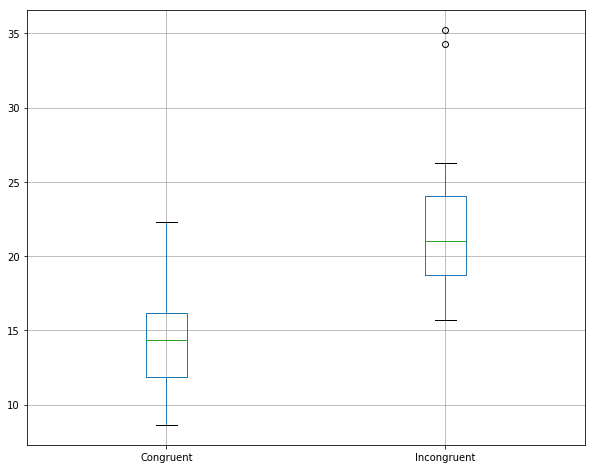

In [119]:
plt.figure(figsize=(10,8))
stroop.boxplot(['Congruent', 'Incongruent'])

From the box plot we can see that the mean response time of the Incongruent group is obviously larger than the mean response time of the Congruent group. Although this might because of the two outliers in the Incongruent group that skew the mean response time of the Incongruent group. 

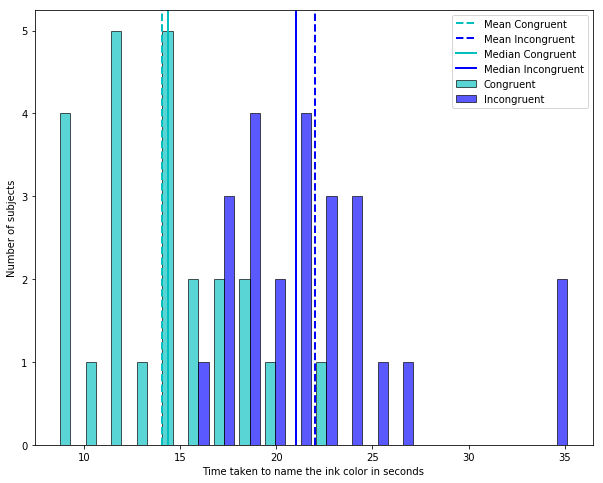

In [120]:
plt.figure(figsize=(10,8))
result = plt.hist([stroop['Congruent'], stroop['Incongruent']], bins=20, color=['c', 'b'], edgecolor='k', alpha=0.65, label = ['Congruent', 'Incongruent'])

plt.axvline(stroop['Congruent'].mean(), color='c', linestyle='dashed', linewidth=2, label = 'Mean Congruent')
plt.axvline(stroop['Incongruent'].mean(), color='b', linestyle='dashed', linewidth=2, label = 'Mean Incongruent')

plt.axvline(stroop['Congruent'].median(), color='c', linestyle='solid', linewidth=2, label = 'Median Congruent')
plt.axvline(stroop['Incongruent'].median(), color='b', linestyle='solid', linewidth=2, label = 'Median Incongruent')

plt.xlabel('Time taken to name the ink color in seconds')
plt.ylabel('Number of subjects')
plt.legend()

From the histograms we can prove our conclusion from the box plot that the mean response time of the Incongruent group is skewed by the two outliers as the mean of the Incogruent group is larger than the group's median response time. Whereas the mean and median response time for Congruent group are almost identical.


#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


First I will get the $t_{critical}$ at $\alpha = 0.05$.

In [121]:
# Compute the t-critical value at alpha = 0.05
t_critical_alpha = stats.t.ppf(1-0.05, 23)
t_critical_alpha

1.7138715277470473

Now get the Degree of Freedom

In [122]:
# Degree of freedom
df = sampleSize - 1
df

23

To calculate the Standard Error of Mean Difference:

In [123]:
# Standard Error of the mean difference
seMeanDiff = sdDiff/(sampleSize**(1/2.0))
seMeanDiff

0.99302863477834058

From the Standard Error of Mean Difference, we can now calculate the $t_{statistics}$:

In [124]:
# t-statistics value
t_statistics = (meanIncon - meanCon)/seMeanDiff
t_statistics

8.020706944109957

We can see that $$t_{statistics} > t_{critical\_alpha}$$

In [125]:
stats.ttest_rel(stroop['Incongruent'],stroop['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The one-tailed t-test with $t_{statistics} = 8.021$ will have a P_value of 2.05e-08. This value is obviously less than 0.05. 

### Conclusion
What we learned from the above statistical test is that for the one-tailed dependent t-test of paired samples, with the $\alpha$ level of 0.05, the $t_{statistics}$ value is 8.021 and is greater than the $t_{critical}$ value 1.714. The P-value under the $t_{statistics}$ is 2.05e-08 and is less than P-value of 0.05. Therefore we will reject the null hyopthesis $H_{0}$ in favor of the alternative hypothesis $H_{a}$ to conclude that the reaction time of the incongruent words condition task is significantly longer than that of the congruent words condition. The Stroop Effetct definitely increases people's reaction time of telling the ink color of the words.

### References
1. scipy t test: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html
2. LaTex Cheat Sheet: https://www.nyu.edu/projects/beber/files/Chang_LaTeX_sheet.pdf
3. Matplotlib Histogram: https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
4. Matplotlib Reference Line: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html